## ****Importing the Libraries and the Cancer Dataset****

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv(r'https://query.data.world/s/xlh353wvypzveoxm7h4u4c6hnucftk', encoding = "ISO-8859-1")

In [ ]:
#Looking at the Dimensions of the Dataset
df.shape 

(3047, 34)

### Data Preparation

In [ ]:
#Looking at the dataset Values and its type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [ ]:
#Dropping 2 Columns because of their Missing Values
df = df.drop(['PctSomeCol18_24','PctPrivateCoverageAlone'], axis=1)

In [ ]:
df['PctEmployed16_Over'].describe()

count    2895.000000
mean       54.152642
std         8.315064
min        17.600000
25%        48.600000
50%        54.500000
75%        60.300000
max        80.100000
Name: PctEmployed16_Over, dtype: float64

In [ ]:
#The Third Column with less missing values is filled with the mean of the data present in it.
df['PctEmployed16_Over'].fillna(54.152642, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3047 non-null   float64
 1   avgDeathsPerYear        3047 non-null   int64  
 2   TARGET_deathRate        3047 non-null   float64
 3   incidenceRate           3047 non-null   float64
 4   medIncome               3047 non-null   int64  
 5   popEst2015              3047 non-null   int64  
 6   povertyPercent          3047 non-null   float64
 7   studyPerCap             3047 non-null   float64
 8   binnedInc               3047 non-null   object 
 9   MedianAge               3047 non-null   float64
 10  MedianAgeMale           3047 non-null   float64
 11  MedianAgeFemale         3047 non-null   float64
 12  Geography               3047 non-null   object 
 13  AvgHouseholdSize        3047 non-null   float64
 14  PercentMarried          3047 non-null   

In [ ]:
#Dropped 2 columns as The analysis is overall instead of based on Geolocations.
df = df.drop(['Geography','binnedInc'], axis=1)

In [ ]:
df.shape

(3047, 30)

In [ ]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,2.479662,51.773679,18.224450,35.002068,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,0.429174,6.896928,8.093064,9.069722,4.529059,7.034924,5.394756,8.104942,3.452371,10.647057,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,2.370000,47.750000,12.800000,29.200000,3.100000,30.400000,9.400000,48.900000,5.500000,57.200000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,2.500000,52.400000,17.100000,34.700000,5.400000,35.300000,12.300000,54.152642,7.600000,65.100000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,2.630000,56.400000,22.700000,40.700000,8.200000,39.650000,16.100000,60.000000,9.700000,72.100000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,3.970000,72.500000,64.100000,72.500000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


## Detection of Outliers

In [ ]:
#Detecting Outliers with the help of Z-Score
from scipy import stats
import numpy as np
z= np.abs(stats.zscore(df))
print(z)
df=df[(z<3).all(axis= 1)]
df.shape

[[0.55832793 0.56151822 0.49605667 ... 0.03981779 0.24532391 0.24101109]
 [0.30600329 0.23006748 0.62580062 ... 0.4997902  0.89342793 0.65838175]
 [0.35614015 0.26974596 0.14286478 ... 0.21717556 0.4870854  0.96239123]
 ...
 [0.95777583 0.27768165 0.89249653 ... 1.05119208 0.59498396 1.09236803]
 [0.95777583 0.26577811 0.13205279 ... 0.04215578 1.10174249 0.97841465]
 [0.95777583 0.2737138  1.25909075 ... 0.17828885 0.72984833 1.68291827]]


(2466, 30)

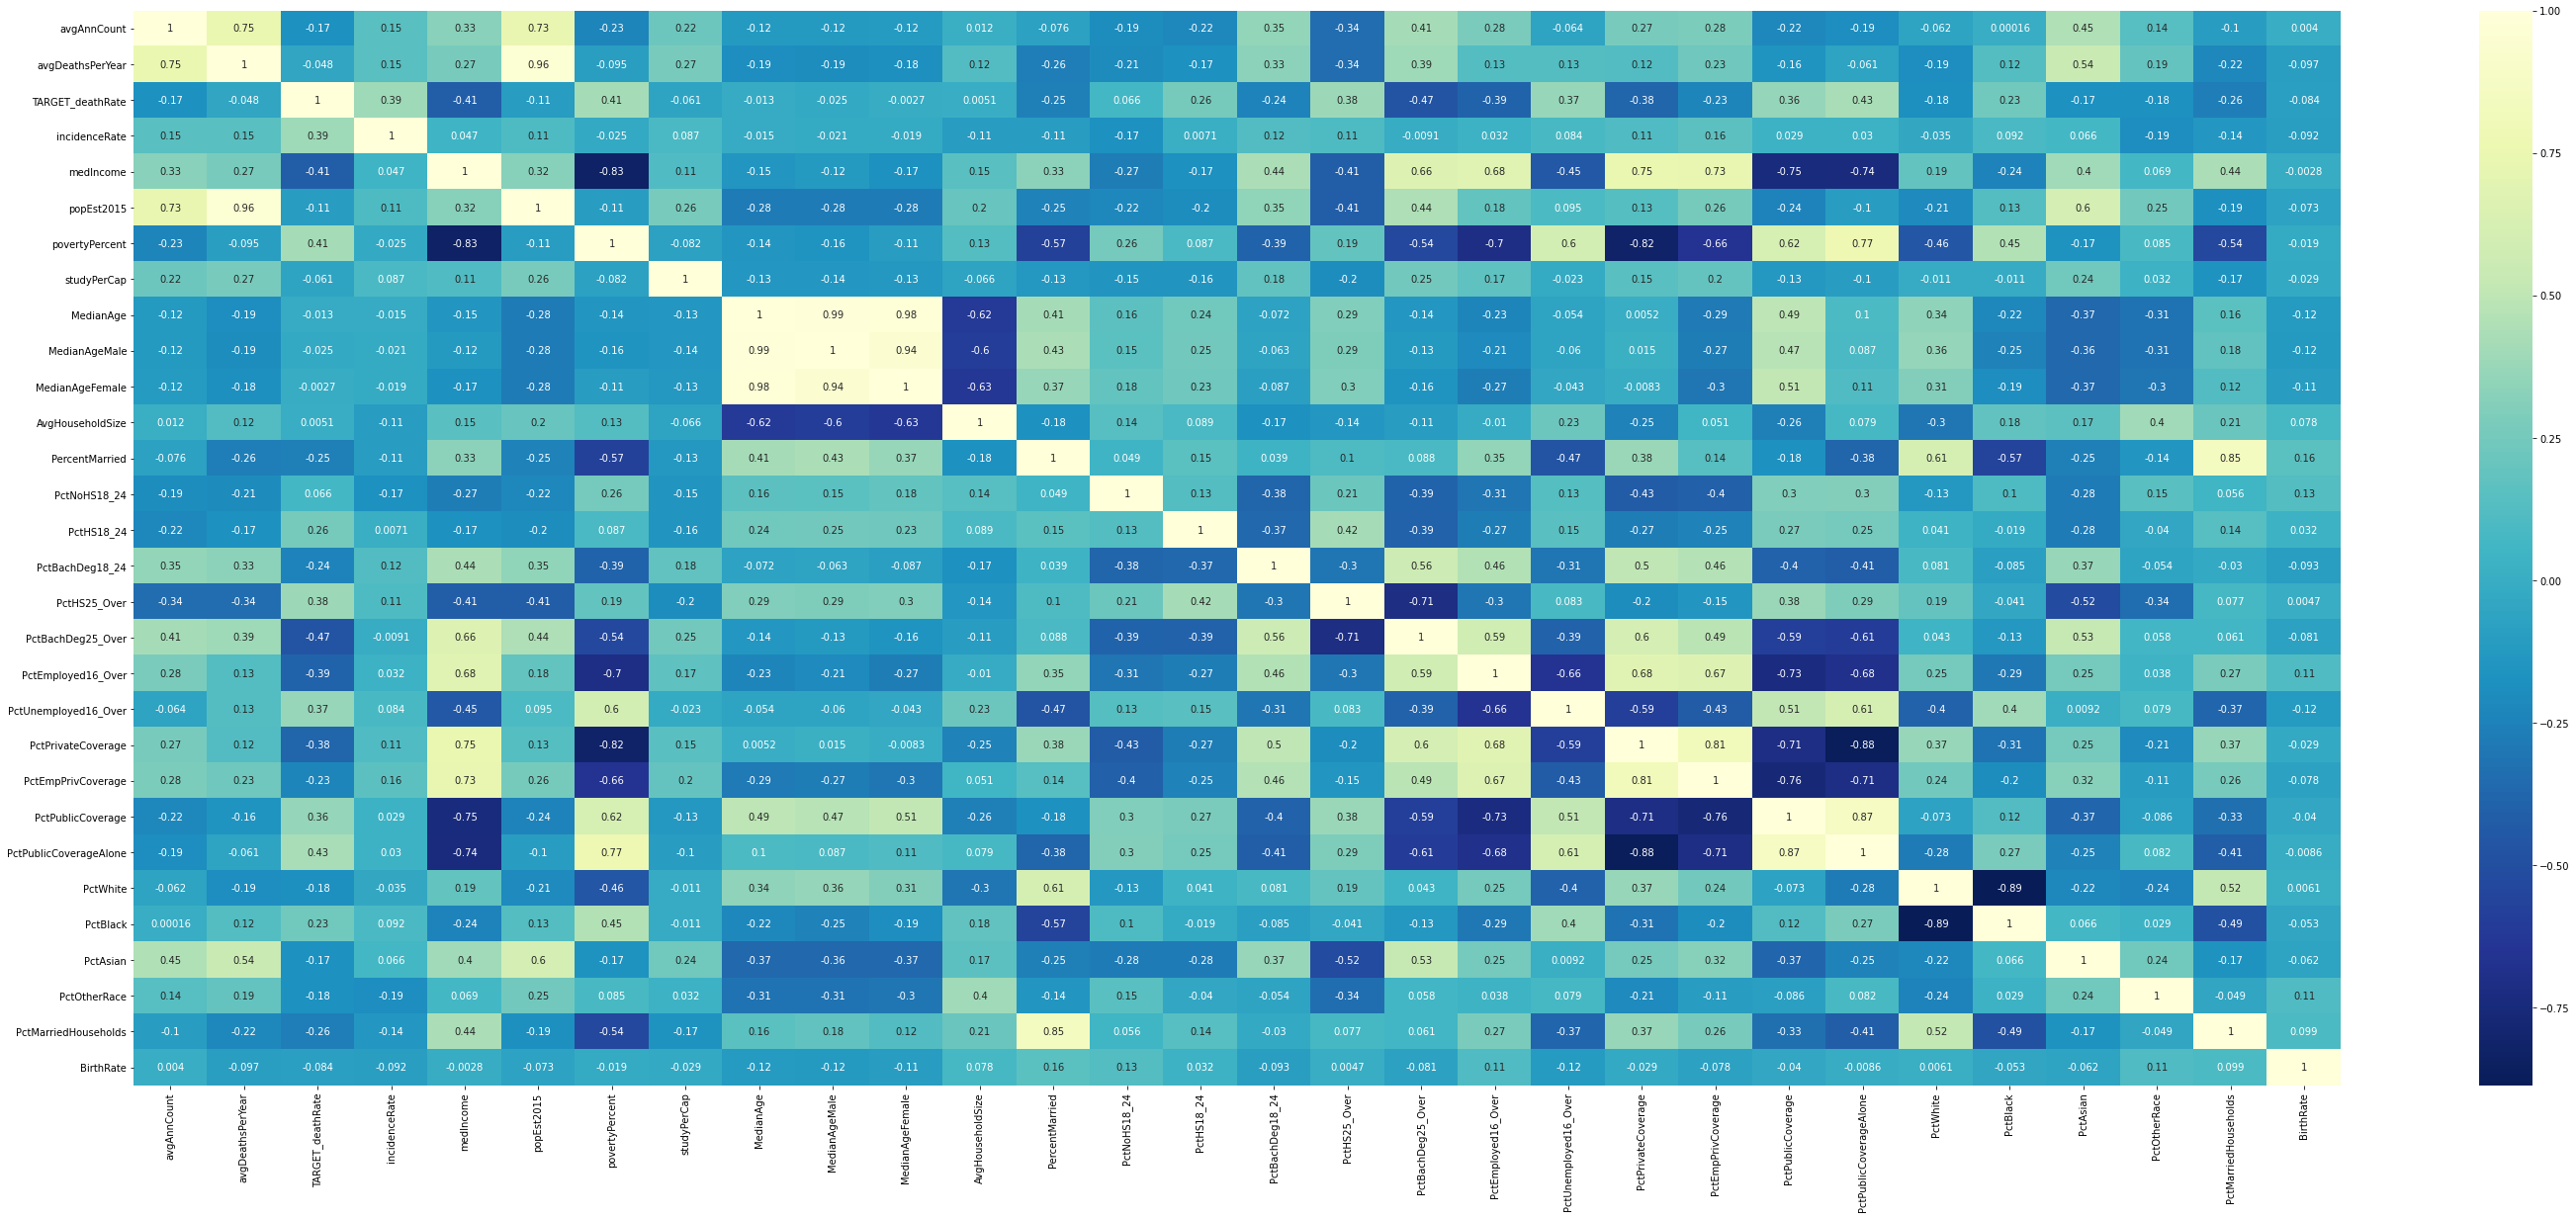

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 20))
sns.heatmap(df.corr(), annot=True, cmap = 'YlGnBu_r')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd629458e80>,
      dtype=object)

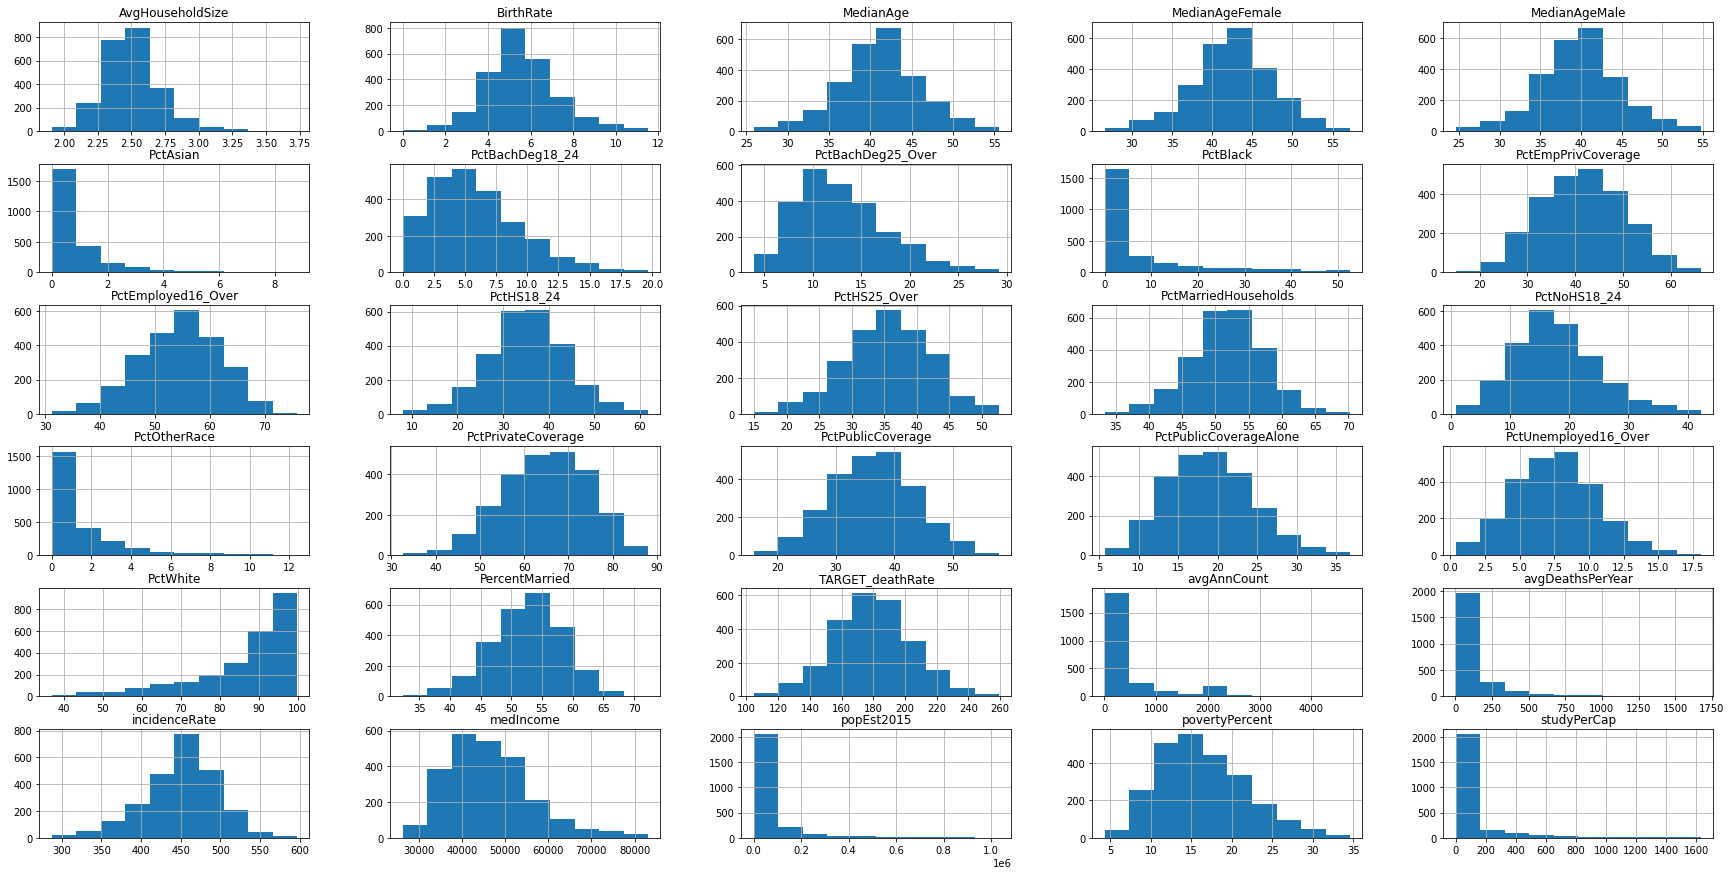

In [ ]:
col = df.columns
df.hist(col, figsize=(30,15))

### Splitting the Data into Training and Testing Sets

In [ ]:
# We specify this so that the train and test data set always have the same rows, respectively
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features
We'll use MinMax Scaling

In [ ]:
#Applying Scaler to all the Columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df_train[col] = scaler.fit_transform(df_train[col])
df_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1183,0.075917,0.081243,0.410587,0.528595,0.547126,0.078734,0.201320,0.282990,0.335593,0.358804,0.343137,0.283333,0.512605,0.388753,0.442940,0.275510,0.322581,0.432653,0.771812,0.265537,0.666062,0.678,0.257757,0.247588,0.883985,0.021162,0.107649,0.101738,0.383519,0.450093
1519,0.055251,0.072282,0.635894,0.559612,0.267096,0.043106,0.458746,0.000000,0.430508,0.425249,0.460784,0.294444,0.476190,0.579462,0.491296,0.132653,0.497312,0.371429,0.539150,0.418079,0.466425,0.424,0.541766,0.504823,0.672182,0.035727,0.072036,0.215020,0.354735,0.512548
74,0.005905,0.006571,0.524209,0.542488,0.215817,0.004890,0.528053,0.000000,0.640678,0.691030,0.568627,0.261111,0.557423,0.481663,0.415861,0.117347,0.862903,0.159184,0.373602,0.451977,0.520871,0.554,0.606205,0.572347,0.961337,0.015924,0.000000,0.009668,0.512894,0.506028
2316,0.369043,0.333333,0.303422,0.586753,0.555591,0.419441,0.240924,0.253697,0.328814,0.345515,0.326797,0.377778,0.596639,0.220049,0.386847,0.581633,0.158602,0.853061,0.686801,0.350282,0.784029,0.746,0.183771,0.173633,0.865718,0.021556,0.302839,0.103613,0.536220,0.400510
2751,0.355124,0.385305,0.477728,0.602262,0.290254,0.298451,0.438944,0.104901,0.572881,0.571429,0.584967,0.277778,0.498599,0.349633,0.419729,0.387755,0.454301,0.469388,0.505593,0.468927,0.470054,0.348,0.532220,0.440514,0.693650,0.260299,0.129486,0.182980,0.419709,0.368223


In [ ]:
df_train.shape

(1726, 30)

In [ ]:
print(df_train.columns)

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')


### Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('TARGET_deathRate')
X_train = df_train

## Building Model
We'll use RFE from Scikit learn


In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)           
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('avgAnnCount', True, 1),
 ('avgDeathsPerYear', True, 1),
 ('incidenceRate', True, 1),
 ('medIncome', False, 10),
 ('popEst2015', True, 1),
 ('povertyPercent', False, 3),
 ('studyPerCap', False, 15),
 ('MedianAge', True, 1),
 ('MedianAgeMale', False, 7),
 ('MedianAgeFemale', False, 14),
 ('AvgHouseholdSize', True, 1),
 ('PercentMarried', True, 1),
 ('PctNoHS18_24', False, 11),
 ('PctHS18_24', False, 2),
 ('PctBachDeg18_24', False, 13),
 ('PctHS25_Over', False, 8),
 ('PctBachDeg25_Over', True, 1),
 ('PctEmployed16_Over', True, 1),
 ('PctUnemployed16_Over', False, 9),
 ('PctPrivateCoverage', True, 1),
 ('PctEmpPrivCoverage', True, 1),
 ('PctPublicCoverage', True, 1),
 ('PctPublicCoverageAlone', True, 1),
 ('PctWhite', False, 5),
 ('PctBlack', False, 6),
 ('PctAsian', False, 12),
 ('PctOtherRace', True, 1),
 ('PctMarriedHouseholds', True, 1),
 ('BirthRate', False, 4)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015',
       'MedianAge', 'AvgHouseholdSize', 'PercentMarried', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctOtherRace',
       'PctMarriedHouseholds'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['medIncome', 'povertyPercent', 'studyPerCap', 'MedianAgeMale',
       'MedianAgeFemale', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctUnemployed16_Over', 'PctWhite', 'PctBlack',
       'PctAsian', 'BirthRate'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[col]

In [ ]:
#Adding a Constant Variable
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
#Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     106.1
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          2.74e-231
Time:                        13:55:27   Log-Likelihood:                 1298.8
No. Observations:                1726   AIC:                            -2566.
Df Residuals:                    1710   BIC:                            -2478.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Model Rebuilding on the Basis of Calculated P-Values and VIF Values

In [ ]:
X_train_new = X_train_rfe.drop(["PctPublicCoverageAlone","AvgHouseholdSize"], axis = 1)

In [ ]:
X_train_new.columns

Index(['const', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'popEst2015', 'MedianAge', 'PercentMarried', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctOtherRace', 'PctMarriedHouseholds'],
      dtype='object')

In [ ]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [ ]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     121.8
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          3.42e-232
Time:                        13:51:23   Log-Likelihood:                 1296.0
No. Observations:                1726   AIC:                            -2564.
Df Residuals:                    1712   BIC:                            -2488.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6668 

In [ ]:
X_train_new = X_train_new.drop(["PctPublicCoverage"], axis = 1)

In [ ]:
X_train_new.columns

Index(['const', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'popEst2015', 'MedianAge', 'PercentMarried', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctOtherRace', 'PctMarriedHouseholds'],
      dtype='object')

In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     131.4
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          1.89e-232
Time:                        13:56:34   Log-Likelihood:                 1294.1
No. Observations:                1726   AIC:                            -2562.
Df Residuals:                    1713   BIC:                            -2491.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6101 

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.40
4,popEst2015,18.35
2,avgDeathsPerYear,17.92
6,PercentMarried,7.43
9,PctPrivateCoverage,5.81
12,PctMarriedHouseholds,5.43
10,PctEmpPrivCoverage,5.18
8,PctEmployed16_Over,3.46
1,avgAnnCount,2.56
7,PctBachDeg25_Over,2.50


In [ ]:
X_train_new = X_train_new.drop(['avgDeathsPerYear', 'popEst2015', 'const'], axis=1)

 Dropping Columns with High VIF Values and Model Rebuilding till a Good Model is achieved

In [ ]:
X_train_new.columns

Index(['avgAnnCount', 'incidenceRate', 'MedianAge', 'PercentMarried',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage',
       'PctEmpPrivCoverage', 'PctOtherRace', 'PctMarriedHouseholds'],
      dtype='object')

In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     151.1
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          4.99e-227
Time:                        14:10:30   Log-Likelihood:                 1276.3
No. Observations:                1726   AIC:                            -2531.
Df Residuals:                    1715   BIC:                            -2471.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6132 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.71
4,PercentMarried,7.37
7,PctPrivateCoverage,5.59
10,PctMarriedHouseholds,5.42
8,PctEmpPrivCoverage,4.96
6,PctEmployed16_Over,3.39
3,MedianAge,2.19
5,PctBachDeg25_Over,2.16
9,PctOtherRace,1.37
1,avgAnnCount,1.33


In [ ]:
scaler = MinMaxScaler()
df_test[df_test.columns] = scaler.fit_transform(df_test[df_test.columns])
y_test = df_test['TARGET_deathRate']
x_test = df_test[X_train_new.columns]
# Adding a constant variable 
x_test = sm.add_constant(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
# Making predictions
y_pred = lm.predict(x_test)

Text(0, 0.5, 'y_pred')

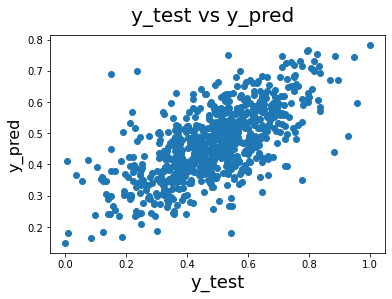

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', round(metrics.r2_score(y_test, y_pred),2 ))

Mean Absolute Error: 0.09446329318295704
Mean Squared Error: 0.015259141851414757
Root Mean Squared Error: 0.12352789908119849
R2 score:  0.42


In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     151.1
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          4.99e-227
Time:                        14:16:15   Log-Likelihood:                 1276.3
No. Observations:                1726   AIC:                            -2531.
Df Residuals:                    1715   BIC:                            -2471.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6132      0.021     29.193      0.000       0.572       0.654
avgAnnCount             -0.0697      0.022     -3.158      0.002      -0.113      -0.026
incidenceRate            0.3930      0.020     19.510      0.000       0.353       0.432
MedianAge               -0.0987      0.026     -3.848      0.000      -0.149      -0.048
PercentMarried           0.1792      0.048      3.715      0.000       0.085       0.274
PctBachDeg25_Over       -0.2241      0.022    -10.274      0.000      -0.267      -0.181
PctEmployed16_Over      -0.1995      0.031     -6.381      0.000      -0.261      -0.138
PctPrivateCoverage      -0.2732      0.038     -7.220      0.000      -0.347      -0.199
PctEmpPrivCoverage       0.2094      0.036      5.898      0.000       0.140       0.279
PctOtherRace            -0.1366      0.020     -6.974      0.000      -0.175      -0.098
PctMarriedHouseholds    -0.2406      0.044     -5.511      0.000      -0.326      -0.155
==============================================================================
Omnibus:                       44.868   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.637
Skew:                           0.041   Prob(JB):                     5.16e-23
Kurtosis:                       4.192   Cond. No.                         44.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""